<a href="https://colab.research.google.com/github/NikSh1891/NikSh1891/blob/main/RFM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFM анализ(Сегментация клиентов)

### Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

In [3]:
df = pd.read_csv('/content/drive/MyDrive/1. Анализ данных/Product/RFM_ht_data.csv', sep=',', parse_dates=True)

<ipython-input-3-1e3f58549228>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/1. Анализ данных/Product/RFM_ht_data.csv', sep=',', parse_dates=True)


### Предварительный анализ данных

In [4]:
# Размер датасета
df.shape

(332730, 4)

In [8]:
df.head()

,InvoiceNo,CustomerCode,InvoiceDate,Amount
0,C0011810010001,19067290,2020-09-01,1716.00
1,C0011810010017,13233933,2020-09-01,1489.74
2,C0011810010020,99057968,2020-09-01,151.47
3,C0011810010021,80007276,2020-09-01,146.72
4,C0011810010024,13164076,2020-09-01,104.00


In [7]:
df[['InvoiceNo', 'CustomerCode']] = df[['InvoiceNo', 'CustomerCode']].astype('str')

In [45]:
# Посмотрим пропуски и типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332730 entries, 0 to 332729
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     332730 non-null  object 
 1   CustomerCode  332730 non-null  object 
 2   InvoiceDate   332730 non-null  object 
 3   Amount        332730 non-null  float64
dtypes: float64(1), object(3)
memory usage: 10.2+ MB


Пропусков в данных нет

In [11]:
# Проверка на дубликаты
print(df['InvoiceNo'].duplicated().sum())
print(df['CustomerCode'].duplicated().sum())

0
208997


In [43]:
# Посмотрим максимальную и минимальные суммы покупок
print(df.Amount.max())
print(df.Amount.min())

131874.0
-8925.0


In [46]:
df.loc[df['Amount'] < 0]

,InvoiceNo,CustomerCode,InvoiceDate,Amount
5196,D0581810010128,13166218,2020-09-01,-3.80
12807,D0211810020467,13163058,2020-09-02,-80.00
12926,D0231810020120,18099094,2020-09-02,-639.77
13726,D0311810020291,19000021,2020-09-02,-1.00
28017,D0621810030773,13134281,2020-09-03,-140.00
47900,D0271810050489,13050388,2020-09-05,-8.45
48223,D0311810050127,10001027,2020-09-05,-90.20
50864,D0541810050090,13079555,2020-09-05,-702.80
51869,D0581810050725,19060084,2020-09-05,-0.87
60865,D0161810060606,18026819,2020-09-06,-185.00


В данных присутствуют минусовые суммы покупок.

### Какое максимальное кол-во покупок было совершено одним пользователем?

In [39]:
# Сгруппируем данные по id пользователя, посчитаем кол-во уникальных заказов по каждому пользователю
df.groupby('CustomerCode', as_index=False).agg({'InvoiceNo': 'nunique'}).sort_values('InvoiceNo', ascending=False).head(1)['InvoiceNo']

89388    204
Name: InvoiceNo, dtype: int64

### RFM сегментация

In [17]:
# Создадим новый датафрейм
RFM_data = df[['CustomerCode', 'InvoiceDate', 'Amount', 'InvoiceNo']]
RFM_data.head()

,CustomerCode,InvoiceDate,Amount,InvoiceNo
0,19067290,2020-09-01,1716.00,C0011810010001
1,13233933,2020-09-01,1489.74,C0011810010017
2,99057968,2020-09-01,151.47,C0011810010020
3,80007276,2020-09-01,146.72,C0011810010021
4,13164076,2020-09-01,104.00,C0011810010024


In [18]:
# Переведем столбец с датой покупки в формат datetime
RFM_data['InvoiceDate'] = pd.to_datetime(RFM_data['InvoiceDate'])

Для начала добавим новые столбцы к нашей таблице

In [19]:
# Создадим переменную now в которой будет содержаться дата отсчета
from datetime import timedelta
now = RFM_data.InvoiceDate.max()

In [20]:
# Сформируем столбцы с кол-вом дней с последней покупки, кол-вом уникальных покупок на пользователя, и суммой покупок на пользователя.
RFM_data = RFM_data.groupby('CustomerCode', as_index=False).agg({'InvoiceDate': lambda x: (now-x.max()).days,
                                                                 'InvoiceNo': lambda x: x.nunique(),
                                                                 'Amount': lambda x: x.sum()})

In [21]:
# Переименуем столбцы и сменим тип данных в столбце с кол-вом дней с последней покупки
RFM_data = RFM_data.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Amount': 'Monetary'})
RFM_data['Recency'] = RFM_data['Recency'].astype(int)

In [22]:
# Создадим переменные по подсегметам с пограничными значениями с помошью квантилей
recency_quant = RFM_data.quantile([0, .25, .5, .75, 1])['Recency'].to_dict()
frequency_quant = RFM_data.quantile([0, .25, .5, .75, 1])['Frequency'].to_dict()
monetary_quant = RFM_data.quantile([0, .25, .5, .75, 1])['Monetary'].to_dict()

<ipython-input-22-76c4b7291546>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  recency_quant = RFM_data.quantile([0, .25, .5, .75, 1])['Recency'].to_dict()
<ipython-input-22-76c4b7291546>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  frequency_quant = RFM_data.quantile([0, .25, .5, .75, 1])['Frequency'].to_dict()
<ipython-input-22-76c4b7291546>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  monetary_quant = RFM_data.quantile([0, .25, .5, .75, 1])['Monetary']

In [23]:
# Создаем функции для присваивания баллов по каждому подсегменту
def r_split(x):
  if x <= recency_quant[0.25]:
    return 1
  elif recency_quant[0.25] < x <= recency_quant[0.5]:
    return 2
  elif recency_quant[0.5] < x <= recency_quant[0.75]:
    return 3
  else:
    return 4

def f_split(x):
  if x <= frequency_quant[0.25]:
    return 4
  elif frequency_quant[0.25] < x <= frequency_quant[0.5]:
    return 3
  elif frequency_quant[0.5] < x <= frequency_quant[0.75]:
    return 2
  else:
    return 1

def m_split(x):
  if x <= monetary_quant[0.25]:
    return 4
  elif monetary_quant[0.25] < x <= monetary_quant[0.5]:
    return 3
  elif monetary_quant[0.5] < x <= monetary_quant[0.75]:
    return 2
  else:
    return 1

In [24]:
# Присвоим баллы пользователям по подсегментам
RFM_data['R'] = RFM_data['Recency'].apply(r_split)
RFM_data['F'] = RFM_data['Frequency'].apply(f_split)
RFM_data['M'] = RFM_data['Monetary'].apply(m_split)

In [25]:
# Объединим оценки в один столбец
RFM_data['RFM_score'] = RFM_data['R'].map(str) + RFM_data['F'].map(str) + RFM_data['M'].map(str)

In [44]:
RFM_data.head()

,CustomerCode,Recency,Frequency,Monetary,R,F,M,RFM_score
0,02213019,19,1,1609.20,4,4,3,443
1,02213042,22,3,9685.48,4,2,1,421
2,02213071,29,1,415.00,4,4,4,444
3,02213088,23,1,305.00,4,4,4,444
4,02213092,25,1,1412.88,4,4,3,443


#### Какая верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М?

In [26]:
RFM_data.loc[RFM_data['M'] == 4]['Monetary'].max()

765.0

#### Какая нижняя граница у количества покупок у пользователей с классом 1 в подсегменте F?

In [27]:
RFM_data.loc[RFM_data['F'] == 1]['Frequency'].min()

4

#### Какое максимальное количество дней может пройти с момента последней покупки для того, чтобы пользователь попал в класс 2 в подсегменте R?

In [28]:
RFM_data.loc[RFM_data['R'] == 2]['Recency'].max()

8

#### Сколько пользователей попало в сегмент 111?

In [29]:
RFM_data.loc[RFM_data['RFM_score'] == '111'].shape[0]

9705

#### Сколько пользователей попало в сегмент 311?

In [30]:
RFM_data.loc[RFM_data['RFM_score'] == '311'].shape[0]

1609

#### В каком RFM-сегменте самое большое кол-во пользователей?

In [31]:
RFM_data.RFM_score.value_counts().head(1)

444    10624
Name: RFM_score, dtype: int64

#### В каком RFM-сегменте самое маленькое кол-во пользователей?

In [32]:
RFM_data.RFM_score.value_counts().tail(1)

414    2
Name: RFM_score, dtype: int64

#### Какое количество пользователей попало в самый малочисленный сегмент?

In [42]:
RFM_data.groupby('RFM_score', as_index=False).agg({'CustomerCode': 'nunique'}).sort_values('CustomerCode').head(1)['CustomerCode']

51    2
Name: CustomerCode, dtype: int64

### Визуализация сегментирования

<Axes: xlabel='Frequency', ylabel='Monetary'>

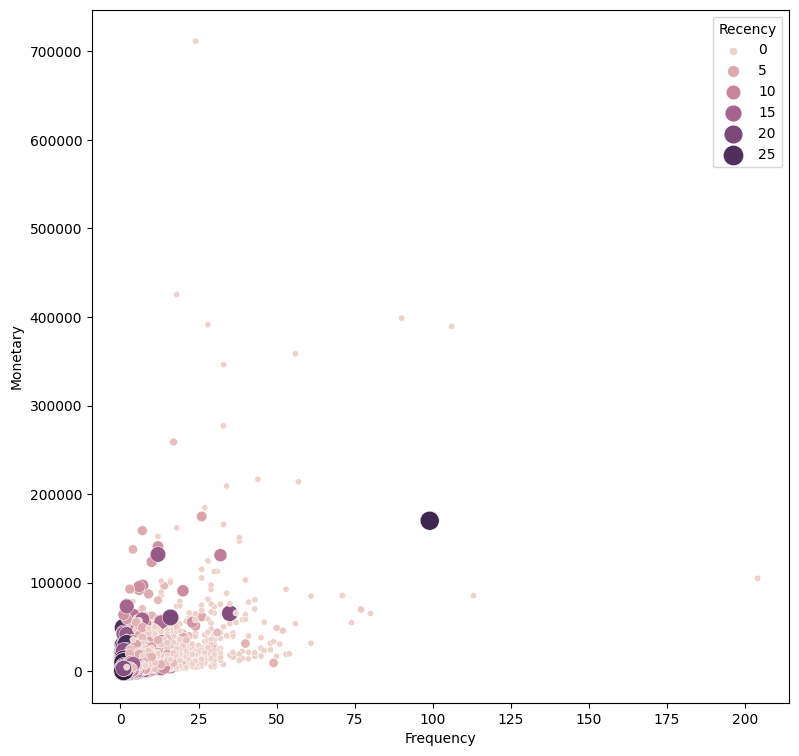

In [35]:
plt.figure(figsize=(9, 9))
sns.scatterplot(RFM_data, x='Frequency', y='Monetary', size='Recency', sizes=(20, 200), hue="Recency")